In [107]:
%matplotlib inline
from keras.models import load_model, Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from keras.datasets import mnist

In [108]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [92]:
model = load_model('model.h5')

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
__________

In [134]:
import os

def preprocess_img(directory):
    imgs= []
    for d in os.listdir(directory):
        path_img = os.path.join(directory,d)
        if os.path.isfile(path_img):
            img = cv2.imread(path_img,0)
            img = cv2.resize(img, (28,28))
            img = img.reshape([img.shape[0],img.shape[0],1])
            img =img/255.
            imgs.append(img)
    imgs= np.asarray(imgs)
    return imgs

def reshape_img(imgs):
    imgs= imgs.reshape(imgs.shape +(1,))
    return imgs

In [195]:
import math
def plot_img(imgs,y,labels=None):
    num_img = imgs.shape[0]
    cols = math.ceil(math.sqrt(num_img))
    rows=math.ceil(math.sqrt(num_img))
    fig,axes = plt.subplots(ncols=cols,nrows=rows, figsize=(10,10))
    plt.subplots_adjust(hspace=0.5,wspace =0.5)
    axes = np.array(axes)
    for i,ax in enumerate(axes.reshape(-1)):
        if i>= num_img:
            break;
        img = imgs[i].reshape(28,28)
        ax.imshow(img,cmap='gray')
        if labels is None:
            ax.set_xlabel(f"predict: {y[i]}")
        else:
            ax.set_xlabel(f"true: {labels[i]}; predict: {y[i]}")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    plt.show()

[1 2 6 0 4 0 4 4 2 3 8 1 0 4 1 2 9 6 0 2 1 7 1 4 4 9]


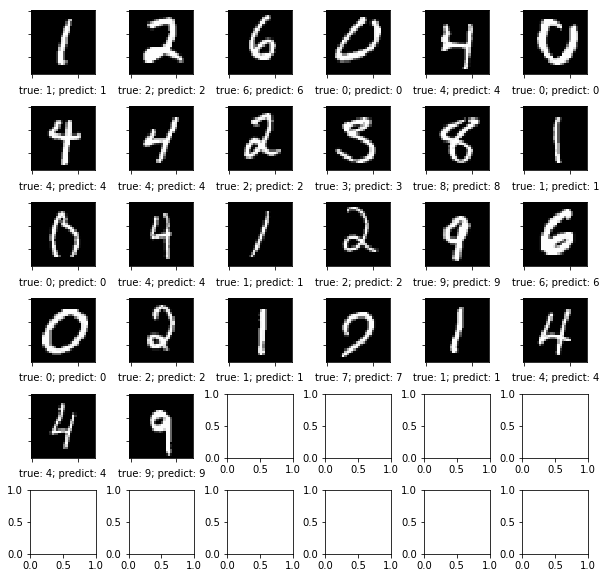

In [196]:
"""print random image"""
"""get data from x_test,y_test"""
indexes = np.random.randint(low=0,high=1000,size=26)
x = reshape_img(x_test[indexes])
labels= y_test[indexes]
y=model.predict_classes(x)
print(y)
plot_img(x,y,labels)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


[0]


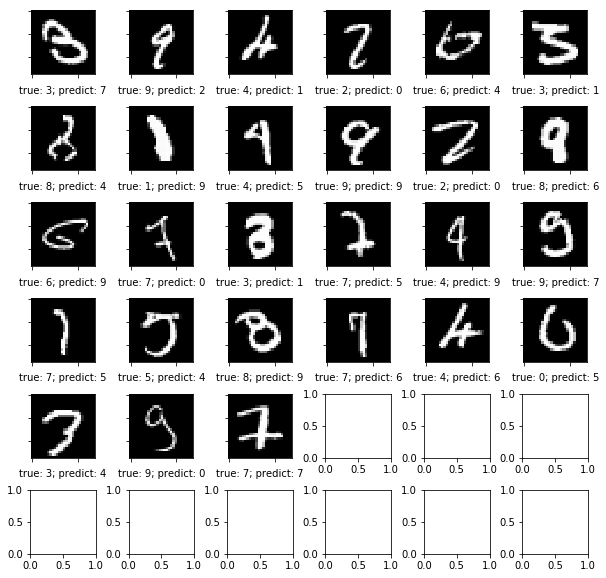

In [186]:
"""print error image"""
"""get data from x_test,y_test"""
indexes = np.random.randint(low=0,high=1000,size=15)
x = reshape_img(x_test)
labels= y_test
y=model.predict_classes(x)
print(y)

compare = y==labels
indexs_error= np.where(compare==False)[0]
print(indexs_error)
if len(indexs_error)>26:
    indexes = indexs_error[0:27]
    x= reshape_img(x_test[indexes])
    labels = labels[indexes]
    y= y[indexes]

plot_img(x,y,labels)

57
[3 0 0 1 0 0 8 1 5 2 1 0 2 2 2 2 2 3 3 3 7 7 4 4 8 2 5 2 5 5 5 5 5 0 5 6 5
 6 1 4 2 5 3 8 4 8 8 8 3 2 9 9 9 2 8 0 1]


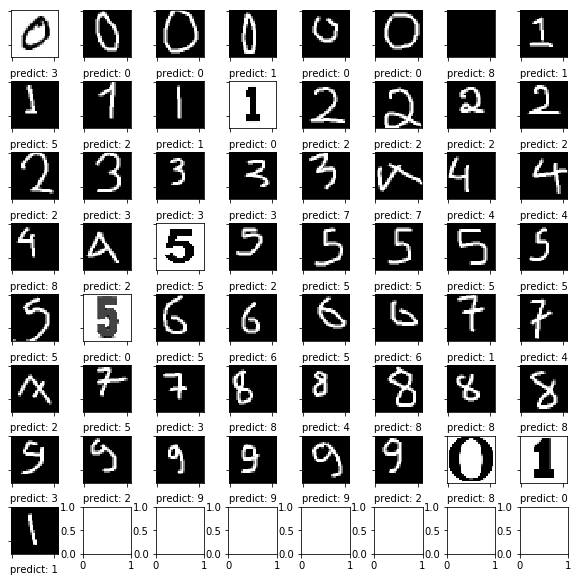

In [198]:
path_img = r"img_test"
imgs = preprocess_img(path_img)
print(len(imgs))
y=model.predict_classes(imgs)
print(y)
plot_img(imgs,y)

In [82]:
import math
math.ceil(math.sqrt(5))

3

In [112]:
x_test[1:10].shape

(9, 28, 28)

In [127]:
a =x_test[1:10]
a= a.reshape(a.shape +(1,))
print(a.shape)

(9, 28, 28, 1)


In [132]:
x = np.arange(1,10)
y=[1,6,4,2]
print(x[y])
print(y_test[1:10])

[2 7 5 3]
[2 1 0 4 1 4 9 5 9]


In [154]:
x= np.arange(1,10) 
if x.all() != None:
    print('a')

a


In [179]:
np.random.seed(0)
a= np.arange(1,10)
print(a)
b= np.random.randint(1,10,size=9)
print(b)
print(np.where(b==4)[0])

[1 2 3 4 5 6 7 8 9]
[6 1 4 4 8 4 6 3 5]
[2 3 5]


In [180]:
x = a==b
print(x)

print(np.where(x==False))

[False False False  True False False False False False]
(array([0, 1, 2, 4, 5, 6, 7, 8], dtype=int64),)
